initial j is: 15.050339512996866
final j on training set is: 0.4535703188490878
w0 to w4: 0.6033915577392408 -2.4712938119041286 0.1372155393112171 -0.5560784072960948 4.147750243270795
final j on test set is: 0.496362194937475
class_0: 257
class_1: 18
tp,fp,tn,fn: 11 7 242 15
Accuracy: 0.92
Precision: 0.611
Recall: 0.423
F1 value: 0.5


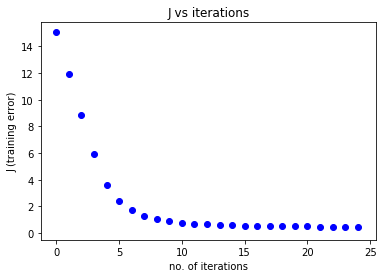

In [5]:
###### CPSC 6820 FINAL PROJECT PART 2: Logistic Regression ######
###### Author: Netra Inamdar ######
###### Created Date: 11/09/19 ######

import matplotlib.pyplot as plt
import numpy as np
import random,math

filename='data_banknote_authentication.txt' 
fin=open(filename,"r")
rows = int(fin.readline()) # read no. of rows
data = np.zeros([rows, 5])
test_set = np.zeros([275, 5])
train_set= np.zeros([1097,5])
 
for k in range(rows):
    aString= fin.readline()
    aString = aString.replace("\n", "")
    for j in range(5):
        floats = [float(x) for x in aString.split(',')]
        data[k,j] = floats[j] # store entire file data in data array
fin.close()

'''
# Standardization:
body_len_arr=[]
fin_len_arr=[]
for k in range(rows):
    body_len_arr.append(data[k,0]) # body length values
    fin_len_arr.append(data[k,1]) #fin length values
    
body_mean=np.mean(body_len_arr) # mean of body length values
body_std=np.std(body_len_arr) # std deviation of body length values
fin_mean=np.mean(fin_len_arr) # mean of fin length values
fin_std=np.std(fin_len_arr) # std deviation of fin length values
print('body mean,std:',body_mean,body_std)
print('fin mean,std:',fin_mean,fin_std)

for dataset in data:
    dataset[0]=(dataset[0]-body_mean)/body_std
    dataset[1]=(dataset[1]-fin_mean)/fin_std
'''

random.shuffle(data)
test_set_ind=np.random.choice(rows, 275, replace=False) # select 275 rows 
test_set=data[test_set_ind] # test dataset with 275 records
        
train_set_ind=[x for x in range(rows) if x not in test_set_ind]
train_set=data[train_set_ind] # train set with other records    

#print(len(train_set)) # 1097

# initial values of weights and learning rate
w0=1
w1=-1
w2=4
w3=-1
w4=4
alpha=0.0001
x0=x1=x2=x3=x4=0

m=1097 # Training dataset size
h_sum=0
for i in range(m):
    x0=1
    x1=train_set[i,0] 
    x2=train_set[i,1]
    x3=train_set[i,2]
    x4=train_set[i,3]
    
    y=train_set[i,4]
    h=1.00/(1.00+math.exp(-(w0*x0+w1*x1+w2*x2+w3*x3+w4*x4))) # h calculation
    first_sum=y*(np.log(h))
    second_sum=(1-y)*(np.log(1-h))
    h_sum+=(first_sum+second_sum)
    #h_sum+=(h-train_set[i,2])**2 # calculate summation over m records

#print(h_sum)
j_cost_fun=-(h_sum/m) # initial cost function
print('initial j is:',j_cost_fun) # Init J value: 2822.33

for i in range(25): # no of iterations selected: 50
    new_error=0
    for j in range(m):
        x0=1
        x1=train_set[j,0]
        x2=train_set[j,1]
        x3=train_set[j,2]
        x4=train_set[j,3]
        y=train_set[j,4]
        #print(-(w0*x0+w1*x1+w2*x2))
        #print(math.exp(-(w0*x0+w1*x1+w2*x2)))
        h=1/(1+math.exp(-(w0*x0+w1*x1+w2*x2+w3*x3+w4*x4))) # h calculation
        first_sum=y*(np.log(h))
        second_sum=(1-y)*(np.log(1-h))
        new_error+=first_sum+second_sum
        #new_error+=(h-train_set[j,2])**2 # new error calculation
    
    temp0_cost=0
    temp1_cost=0
    temp2_cost=0
    temp3_cost=0
    temp4_cost=0

    for j in range(m):
        x0=1
        x1=train_set[j,0]
        x2=train_set[j,1]
        x3=train_set[j,2]
        x4=train_set[j,3]
        y=train_set[j,4]
        h=1/(1+math.exp(-(w0*x0+w1*x1+w2*x2+w3*x3+w4*x4))) # h calculation
        temp0_cost+= (h-y)
        temp1_cost+= (h-y)*x1
        temp2_cost+= (h-y)*x2
        temp3_cost+= (h-y)*x3
        temp4_cost+= (h-y)*x4
        
    temp0=w0-(alpha*temp0_cost)
    temp1=w1-(alpha*temp1_cost)
    temp2=w2-(alpha*temp2_cost)
    temp3=w3-(alpha*temp3_cost)
    temp4=w4-(alpha*temp4_cost)

    w0=temp0
    w1=temp1
    w2=temp2
    w3=temp3
    w4=temp4
    
    plt.scatter(i,-(new_error/m),color='blue')  # Plot J vs no of iterations
    plt.xlabel('no. of iterations')
    plt.ylabel('J (training error)')
    plt.title('J vs iterations')
    
print('final j on training set is:', -(new_error/m))
print('w0 to w4:',w0,w1,w2,w3,w4) # final values of w0 to w2


m=275 # test dataset size
h_sum=0
tn=0
fn=0
tp=0
fp=0
class_0=0
class_1=0
for i in range(m):
        x0=1
        x1=test_set[i,0] 
        x2=test_set[i,1]
        x3=test_set[i,2] 
        x4=test_set[i,3]
        y=test_set[i,4]
        h=1.00/(1.00+math.exp(-(w0*x0+w1*x1+w2*x2+w3*x3+w4*x4))) # h calculation
        if (h<0.50):
            class_0+=1
            if (y==0.0):
                tn+=1
            elif (y==1.0):
                fn+=1
        if (h>=0.50):
            class_1+=1
            if (y==1.0):
                tp+=1
            elif (y==0.0):
                fp+=1
                
        first_sum=y*(np.log(h))
        second_sum=(1-y)*(np.log(1-h))
        h_sum+=(first_sum+second_sum)


print('final j on test set is:', -(h_sum/m))
print('class_0:',class_0)
print('class_1:',class_1)
print('tp,fp,tn,fn:',tp,fp,tn,fn)

accuracy=(tp+tn)/(tp+tn+fp+fn)
precision=(tp)/(tp+fp)
recall=(tp)/(tp+fn)
f1_denom=(1/precision)+(1/recall)
F1=2*(1/f1_denom)

print('Accuracy:',np.round(accuracy,3))
print('Precision:',np.round(precision,3))
print('Recall:',np.round(recall,3))
print('F1 value:',np.round(F1,3))

In [ ]:
'''
# Final weights used for user input and prediction:
w0= 1.988
w1= -1.530
w2= -0.925
body_mean=88.465
body_std=12.914
fin_mean=12.401
fin_std=3.629
    
test_val = np.zeros(2)
test_val[0]=input("Enter body length in cms (Enter 0 to exit): ")
test_val[1]=input("Enter dorsal fin length in cms (Enter 0 to exit): ")

while (test_val[0]!=0 or test_val[1]!=0):
    test_val[0]=((test_val[0]-body_mean)/(body_std))
    test_val[1]=((test_val[1]-fin_mean)/(fin_std))

    x0=1
    x1=test_val[0]
    x2=test_val[1]
    try:
        h=1.00/(1.00+math.exp(-(w0*x0+w1*x1+w2*x2))) # h calculation
        if (h<0.50):
            print('TigerFish0')
        elif (h>=0.50):
            print('TigerFish1')
    except OverflowError:
        print('TigerFish1')
    
    test_val[0]=input("Enter next body length in cms: ") # enter next 2 values
    test_val[1]=input("Enter next dorsal fin length in cms: ")
    
print("Program ends here.") # ends when both values entered are 0, 0
'''